In [1]:
#importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


## EDA

In [3]:
print(df.shape,'\n',df.dtypes)

(76014, 15) 
 mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object


**Pandas Profiling**

In [4]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
# profile.to_file("output.html")

In [5]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].nunique()))

mid : 617
date : 442
venue : 35
bat_team : 14
bowl_team : 14
batsman : 411
bowler : 329
runs : 252
wickets : 11
overs : 140
runs_last_5 : 102
wickets_last_5 : 8
striker : 155
non-striker : 88
total : 138


**No missing Values**

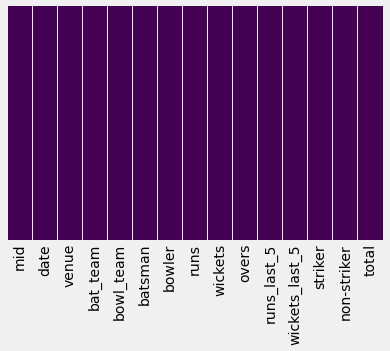

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
#lets seprate categoraical and numerical features
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'object']
categorical_features = categorical_features[1:] #lets skip date
categorical_features

['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']

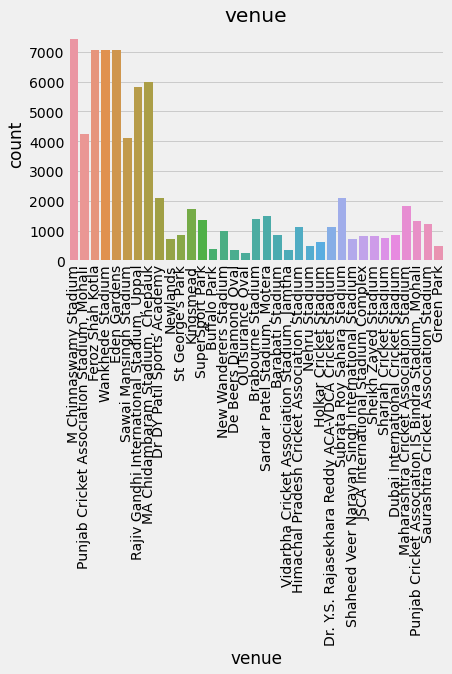

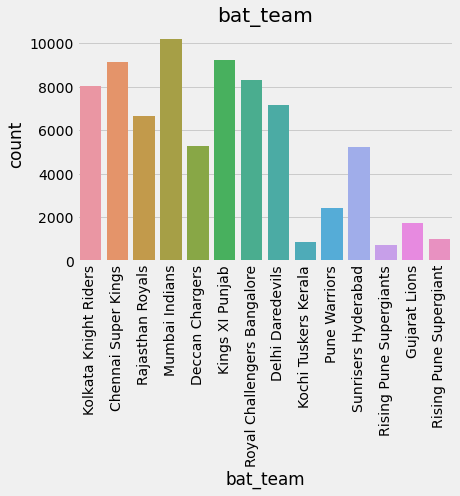

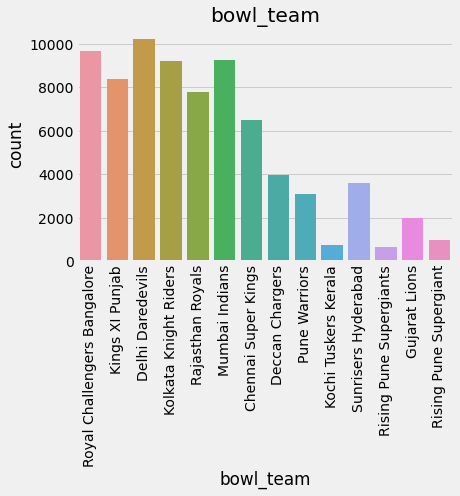

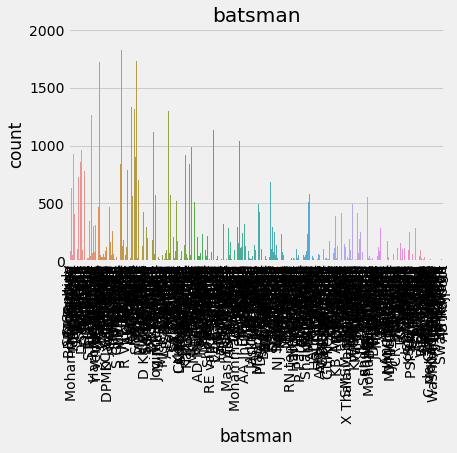

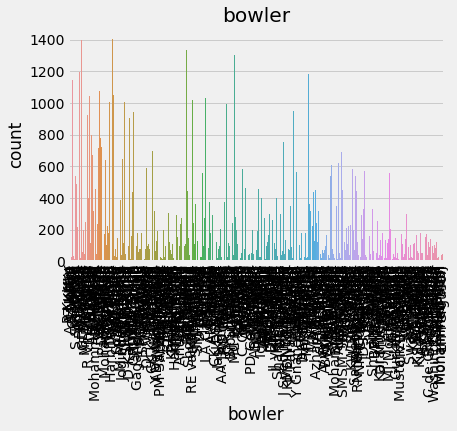

In [8]:
for feature in categorical_features:
    sns.countplot(df[feature])
    plt.xticks(rotation=90)
    plt.title(feature)
    plt.show()

**1) As you can see from above plot many teams are not playing the ipl current season like Rising Pune Supergaints so will keep only the current season IPL team**

**2) The cardinality between the batsmen and bowler is also very high so will remove that columns**

In [9]:
categorical_features = categorical_features[:-2]

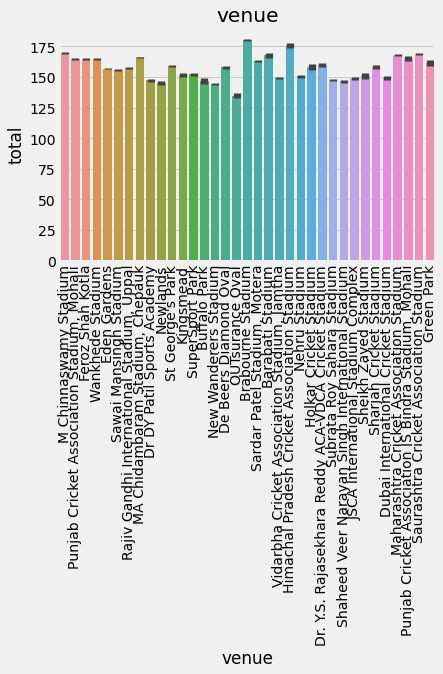

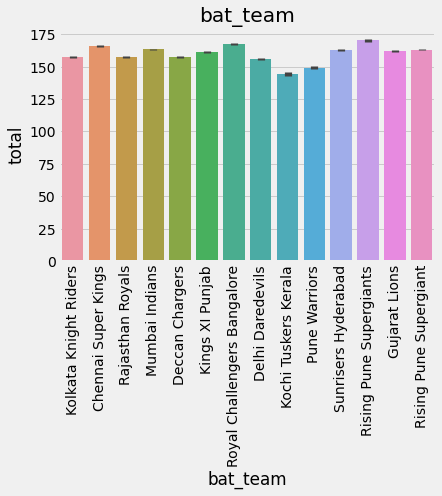

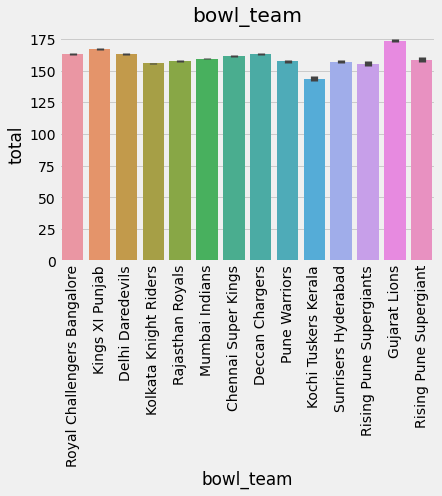

In [10]:
for feature in categorical_features:
    sns.barplot(x=df[feature], y=df['total'])
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

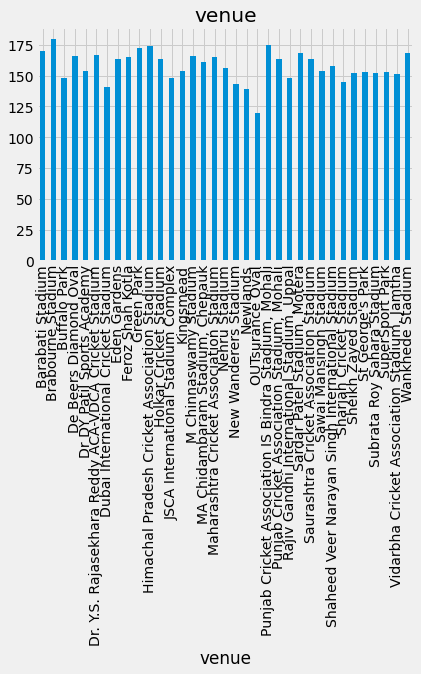

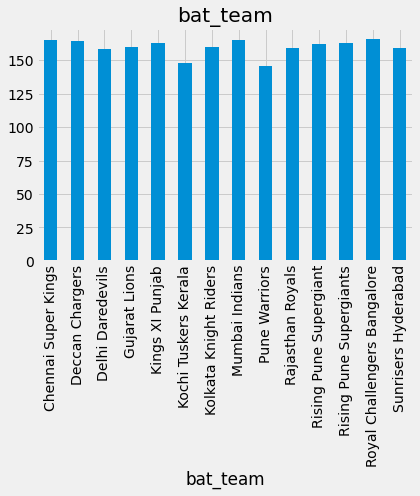

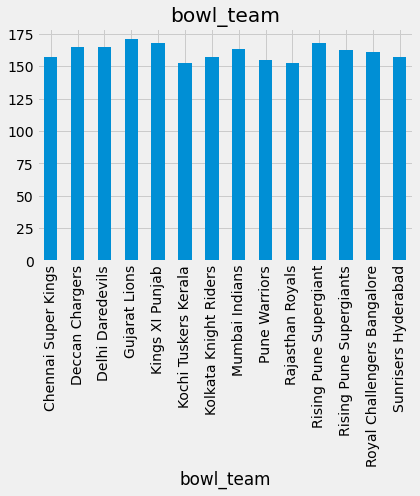

In [11]:
for feature in categorical_features:
    df.groupby(feature)['total'].median().plot(kind='bar')
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [12]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!= 'object']
numerical_features = numerical_features[2:-3]
numerical_features

['wickets', 'overs', 'runs_last_5', 'wickets_last_5']

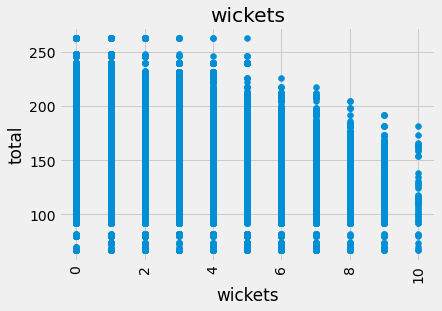

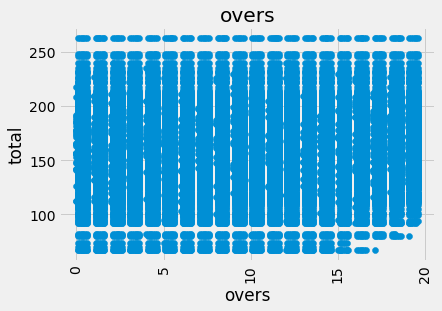

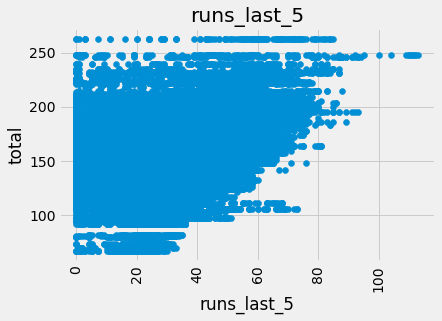

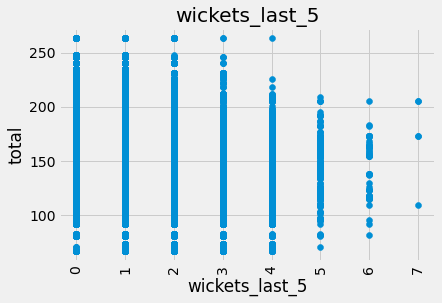

In [13]:
for feature in numerical_features:
    plt.scatter(df[feature] , df['total'])
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel('total')
    plt.title(feature)
    plt.show();

## Data Cleaning
### Points covered under this section:

**• Removing unwanted columns**

**• Keeping only current teams**

**• Removing the first 5 overs data in every match**

**• Converting the column 'date' from string into datetime object**

In [14]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [15]:
columns_to_remove = ['mid', 'batsman', 'bowler', 'striker', 'non-striker']
print('Before removing shape of dataframe {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing shape of dataframe {}'.format(df.shape))

Before removing shape of dataframe (76014, 15)
After removing shape of dataframe (76014, 10)


In [16]:
df.columns

Index(['date', 'venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [17]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [18]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [19]:
current_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians', 'Kings XI Punjab',
                 'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad'
               ]
main = df.copy()

In [20]:
#before removing & after removing
print('Before removing shape : {}'.format(df.shape))
df = df[df['bat_team'].isin(current_teams) & df['bowl_team'].isin(current_teams)]
print('After removing shape : {}'.format(df.shape))

Before removing shape : (76014, 10)
After removing shape : (53811, 10)


In [21]:
print('Bat Team : {}\n\nBowl Team : {}'.format(df['bat_team'].unique() , df['bowl_team'].unique()))

Bat Team : ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']

Bowl Team : ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [22]:
print('Before removing shape : {}'.format(df.shape))
df = df[df['overs']>=5]
print('After removing shape : {}'.format(df.shape))


Before removing shape : (53811, 10)
After removing shape : (40108, 10)


In [23]:
print('Overs smaaler than 5 : {}'.format(df[df['overs']<5]))

Overs smaaler than 5 : Empty DataFrame
Columns: [date, venue, bat_team, bowl_team, runs, wickets, overs, runs_last_5, wickets_last_5, total]
Index: []


In [24]:
from datetime import datetime
# 2008-04-18 ie (year-month-date)
print('Before coverting type {}'.format(type(df['date'].iloc[0])))
df['date'] = df['date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
print('After coverting type {}'.format(type(df['date'].iloc[0])))

Before coverting type <class 'str'>
After coverting type <class 'pandas._libs.tslibs.timestamps.Timestamp'>


# Feature Selection

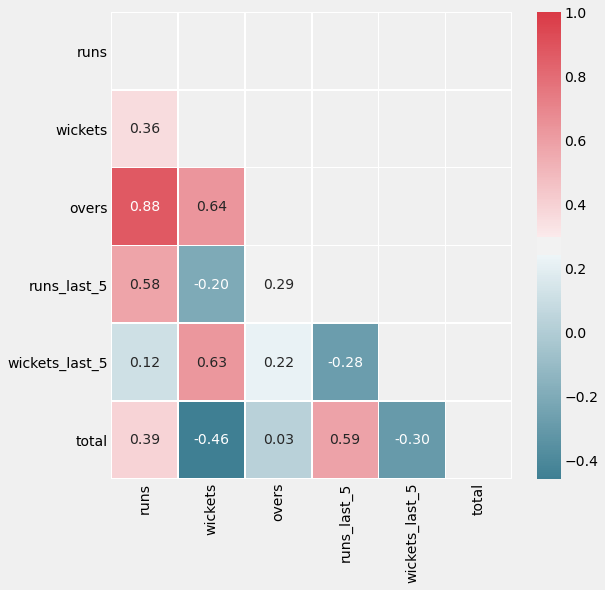

In [25]:
import numpy as np
corr = df.corr()
fig, ax= plt.subplots(figsize=(8,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

wickets and wickets_last_five  highly correalted
overs and runs highly correalted

In [26]:
df.columns

Index(['date', 'venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

# Feature Engg.

In [27]:
df.head(2)

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222


In [28]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [29]:
print(df['venue'].nunique())
df['venue'].value_counts()

31


Eden Gardens                                            4497
M Chinnaswamy Stadium                                   4406
Feroz Shah Kotla                                        4265
Wankhede Stadium                                        4259
MA Chidambaram Stadium, Chepauk                         3734
Punjab Cricket Association Stadium, Mohali              2710
Sawai Mansingh Stadium                                  2516
Rajiv Gandhi International Stadium, Uppal               2221
Sardar Patel Stadium, Motera                            1016
Kingsmead                                               1012
Brabourne Stadium                                        933
Punjab Cricket Association IS Bindra Stadium, Mohali     727
SuperSport Park                                          657
Dubai International Cricket Stadium                      649
Himachal Pradesh Cricket Association Stadium             646
Sheikh Zayed Stadium                                     611
Sharjah Cricket Stadium 

In [30]:
Venues = df.groupby(['venue'])['venue'].count().sort_values(ascending=False)

In [31]:
Venues

venue
Eden Gardens                                            4497
M Chinnaswamy Stadium                                   4406
Feroz Shah Kotla                                        4265
Wankhede Stadium                                        4259
MA Chidambaram Stadium, Chepauk                         3734
Punjab Cricket Association Stadium, Mohali              2710
Sawai Mansingh Stadium                                  2516
Rajiv Gandhi International Stadium, Uppal               2221
Sardar Patel Stadium, Motera                            1016
Kingsmead                                               1012
Brabourne Stadium                                        933
Punjab Cricket Association IS Bindra Stadium, Mohali     727
SuperSport Park                                          657
Dubai International Cricket Stadium                      649
Himachal Pradesh Cricket Association Stadium             646
Sheikh Zayed Stadium                                     611
Sharjah Cricket St

In [32]:
Venues['De Beers Diamond Oval']

92

In [33]:
main = df.copy()

In [34]:
df = main

In [35]:
df.head(2)

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222


In [36]:
def venue_selection(x):
    x = str(x)
    if Venues[x] > 1000:
        return x
    else:
        return 'other'
    #print(type(x))

In [37]:
df['venue'] = df['venue'].apply(lambda x: venue_selection(x))

In [38]:
df['venue'].value_counts()

other                                         9472
Eden Gardens                                  4497
M Chinnaswamy Stadium                         4406
Feroz Shah Kotla                              4265
Wankhede Stadium                              4259
MA Chidambaram Stadium, Chepauk               3734
Punjab Cricket Association Stadium, Mohali    2710
Sawai Mansingh Stadium                        2516
Rajiv Gandhi International Stadium, Uppal     2221
Sardar Patel Stadium, Motera                  1016
Kingsmead                                     1012
Name: venue, dtype: int64

In [39]:
#df.drop(columns=['venue'], inplace=True)
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
le = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['venue'] = le.fit_transform(df['venue']) 
#print(df['venue'].unique())
integer_mapping = {l: i for i, l in enumerate(le.classes_)}

In [40]:
integer_mapping

{'Eden Gardens': 0,
 'Feroz Shah Kotla': 1,
 'Kingsmead': 2,
 'M Chinnaswamy Stadium': 3,
 'MA Chidambaram Stadium, Chepauk': 4,
 'Punjab Cricket Association Stadium, Mohali': 5,
 'Rajiv Gandhi International Stadium, Uppal': 6,
 'Sardar Patel Stadium, Motera': 7,
 'Sawai Mansingh Stadium': 8,
 'Wankhede Stadium': 9,
 'other': 10}

In [41]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,3,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,3,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,3,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,3,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,3,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [42]:
df.head(3)

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,3,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,3,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,3,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222


In [43]:
# Converting categorical feature using OneHotEncoding
encoded_df = pd.get_dummies(data=df, columns=['bat_team' , 'bowl_team'])

In [44]:
encoded_df.head()

,date,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,3,61,0,5.1,59,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,3,61,1,5.2,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,3,61,1,5.3,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,3,61,1,5.4,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,3,61,1,5.5,58,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [45]:
main = encoded_df.copy()

In [46]:
encoded_df.columns

Index(['date', 'venue', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [47]:
encoded_df = encoded_df[['date','venue', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [48]:
encoded_df.head()

,date,venue,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5.1,61,0,59,0,222
33,2008-04-18,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5.2,61,1,59,1,222
34,2008-04-18,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5.3,61,1,59,1,222
35,2008-04-18,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5.4,61,1,59,1,222
36,2008-04-18,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5.5,61,1,58,1,222


In [49]:
X = encoded_df.drop(columns=['total','date'])
print(X.columns , X.shape)
y = encoded_df.iloc[:,-1:]
print(y.columns , y.shape)
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

Index(['venue', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'overs', 'runs', 'wickets',
       'runs_last_5', 'wickets_last_5'],
      dtype='object') (40108, 22)
Index(['total'], dtype='object') (40108, 1)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [50]:
print(model.feature_importances_)

[0.05643221 0.01558988 0.01415636 0.01466332 0.01309219 0.01517812
 0.0151736  0.0155623  0.00967988 0.01170466 0.01224375 0.01524938
 0.01321964 0.01563805 0.01636606 0.01421543 0.01151086 0.06336444
 0.22370765 0.20924095 0.1917669  0.03224437]


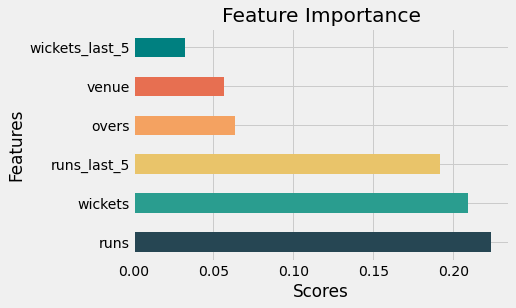

In [51]:
#lets plot a graph of extra tree classifier
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(6).plot(kind='barh', color=['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51' , 'teal'])
plt.title('Feature Importance')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show();

# Model-Building

In [52]:
encoded_df.columns

Index(['date', 'venue', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'overs', 'runs', 'wickets',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [53]:
X_train = encoded_df.drop(labels=['total'],axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels=['total'],axis=1)[encoded_df['date'].dt.year >= 2017]

In [54]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [55]:
#removing date column
X_train.drop(columns=['date'],inplace=True)
X_test.drop(columns=['date'],inplace=True)

In [56]:
print("X_train : {}      X_test : {}\ny_train : {}         y_test : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (37330, 22)      X_test : (2778, 22)
y_train : (37330,)         y_test : (2778,)


In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [58]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.65078e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.18587e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.46489e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.50001e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.4319e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\ri

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [59]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 40}
-330.37736102873765


In [60]:
prediction=ridge_regressor.predict(X_test)

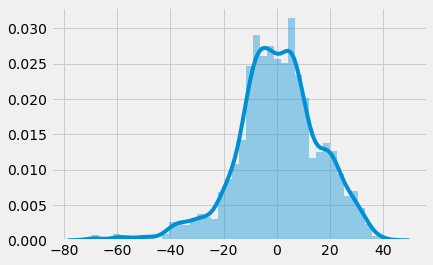

In [61]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [62]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.12138796431555
MSE: 250.98196648877138
RMSE: 15.842410374964139


In [63]:
# save the model to disk
import pickle
filename = 'ridge_regressor_model_venue.pkl'
pickle.dump(ridge_regressor, open(filename, 'wb'))


# Predictions

In [64]:
def predict_score(venue='Eden Gardens', batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
    
    
    temp_array = list()
    if venue == 'Eden Gardens':
        temp_array = temp_array + [0]
    elif venue == 'Feroz Shah Kotla':
        temp_array = temp_array + [1]
    elif venue == 'Kingsmead':
        temp_array = temp_array + [2]
    elif venue == 'M Chinnaswamy Stadium':
        temp_array = temp_array + [3]
    elif venue == 'MA Chidambaram Stadium, Chepauk':
        temp_array = temp_array + [4]
    elif venue == 'Punjab Cricket Association Stadium':
        temp_array = temp_array + [5]
    elif venue == 'Rajiv Gandhi International Stadium':
        temp_array = temp_array + [6]
    elif venue == 'Sardar Patel Stadium':
        temp_array = temp_array + [7]
    elif venue == 'Sawai Mansingh Stadium':
        temp_array = temp_array + [8]
    elif venue == 'Wankhede Stadium':
        temp_array = temp_array + [9]
    elif venue == 'other':
        temp_array = temp_array + [10]

    # Batting Team
    if batting_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif batting_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif batting_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif batting_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif batting_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif batting_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif batting_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif batting_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]

    # Bowling Team
    if bowling_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif bowling_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif bowling_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif bowling_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif bowling_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif bowling_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif bowling_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif bowling_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]

    # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
    temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

    # Converting into numpy array
    temp_array = np.array([temp_array])
    print(temp_array)

    # Prediction
    return int(ridge_regressor.predict(temp_array)[0])

In [65]:
X_train.columns

Index(['venue', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'overs', 'runs', 'wickets',
       'runs_last_5', 'wickets_last_5'],
      dtype='object')

In [66]:
final_score = predict_score(venue='Eden Gardens' ,batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils',
                            overs=9.2, runs=79, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))


[[ 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   9.2 79.   2.  60.   1. ]]
The final predicted score (range): 159 to 174


In [67]:
final_score = predict_score(venue='M Chinnaswamy Stadium', batting_team='Sunrisers Hyderabad', bowling_team='Royal Challengers Bangalore', overs=10.5, runs=67, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))


[[ 3.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   1.   0.  10.5 67.   3.  29.   1. ]]
The final predicted score (range): 138 to 153


In [68]:
final_score = predict_score(venue='Wankhede Stadium',batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))


[[  9.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    1.
    0.    0.    0.    0.    0.   14.1 136.    4.   50.    0. ]]
The final predicted score (range): 180 to 195
